# Predicting Student Absence rates using Time Management - A Deep Learning Model

This dataset has been downloaded off Kaggle through this [link](https://www.kaggle.com/xiaowenlimarketing/international-student-time-management/data#). It contains questionnaire items related to time management information, which could potentially be used to predict a student's absentee rate in class. However, it should be noted that the dataset only has 125 entries and the results of the model would need to be validated on much larger samples. This notebook is for illustrative purposes.

- Number - Participant number
- Age
- Gender
- Nationality
- Program (Foundation, International Year One, Pre-Master's and Language Only)
- Course Name
- English proficiency
- Academic Marks
- Attendence Level (low to high)
- Time management questionnaire items

Imports the necessary libraries for dataframe manipulation and graphing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imports the CSV file and assign as "students" dataframe.

In [2]:
students = pd.read_csv('International_students_Time_management_data.csv')

Checks header values of dataframe

In [3]:
students.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree


Checks column types and number of rows - 125 in this case.

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 21 columns):
Number         125 non-null int64
Age            125 non-null object
Gender         125 non-null object
Nationality    125 non-null object
Program        125 non-null object
Course         125 non-null object
English        119 non-null object
Academic       103 non-null object
Attendance     119 non-null object
6              123 non-null object
7              125 non-null object
8              121 non-null object
9              118 non-null object
10             124 non-null object
11             123 non-null object
12             122 non-null object
13             125 non-null object
14             124 non-null object
15             125 non-null object
16             123 non-null object
17             124 non-null object
dtypes: int64(1), object(20)
memory usage: 20.6+ KB


## Descriptive Statistics and Plots

Before deciding on which columns to use for prediction, here are some descriptions of the variables available.

Lists unique Age categories.

In [5]:
pd.Series(students.Age.unique())

0    31-35
1    26-30
2    21-25
3    18-20
4      >36
5      <18
dtype: object

Visualises a histogram of age categories.

Text(0, 0.5, 'Frequency')

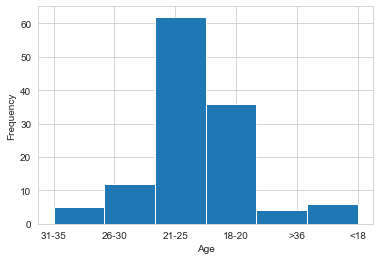

In [6]:
sns.set_style('whitegrid') # style
students['Age'].hist(bins=6) # number of bins for the x-axis
plt.rcParams.update({'font.size': 15}) # font size
plt.xlabel('Age') # label of x-axis
plt.ylabel('Frequency') # label of y-axis

Lists gender categories

In [7]:
pd.Series(students.Gender.unique())

0    M
1    F
dtype: object

Counts how many of each gender have enrolled in the courses.

In [8]:
students.Gender.value_counts()

F    63
M    62
Name: Gender, dtype: int64

Gender count is roughly equivalent.

Counts the number of people enrolled in each course

In [9]:
students['Course'].value_counts()

Business                          80
Law/Legal studies                 14
Social Sciences and Humanities    11
Art and Design                     7
Computing                          6
Science and engineering            4
Media and Communications           3
Name: Course, dtype: int64

Plots the number of people enrolled in each course, broken down by gender

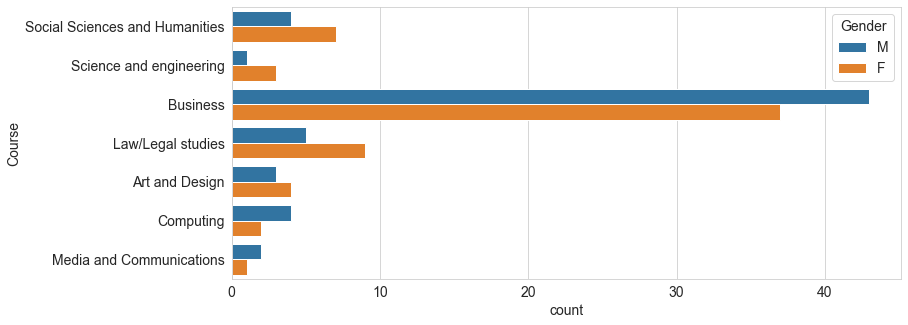

In [10]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size': 14})
sns.countplot(y='Course', hue='Gender', data=students)

Students taking Business vastly outnumber students in other programs. There are slightly more males enrolled in the programme compared to females.

Checks number of unique nationalities.

In [11]:
pd.Series(students.Nationality.unique())

0                   Korea
1                   China
2                   Kenya
3                 Vietnam
4                   India
5            Saudi Arabia
6                Tanzania
7                    Oman
8                  Jordan
9                Zimbabwe
10               Portugal
11                Georgia
12              Singapore
13               Malaysia
14                  Qatar
15                 Turkey
16                 Kuwait
17                  OCEAN
18                     UK
19               Pakistan
20               Thailand
21              Indonesia
22    Trinidad and Tobago
23               Colombia
24                  Gongo
25                Ukraine
dtype: object

Counts students by Nationality

In [12]:
students['Nationality'].value_counts()

China                  77
Korea                   6
Saudi Arabia            6
Oman                    5
Vietnam                 3
India                   3
Tanzania                2
Turkey                  2
Zimbabwe                2
Qatar                   2
Kuwait                  2
OCEAN                   1
Kenya                   1
Jordan                  1
UK                      1
Singapore               1
Malaysia                1
Trinidad and Tobago     1
Indonesia               1
Pakistan                1
Portugal                1
Colombia                1
Thailand                1
Ukraine                 1
Georgia                 1
Gongo                   1
Name: Nationality, dtype: int64

Visualises student count by Nationality

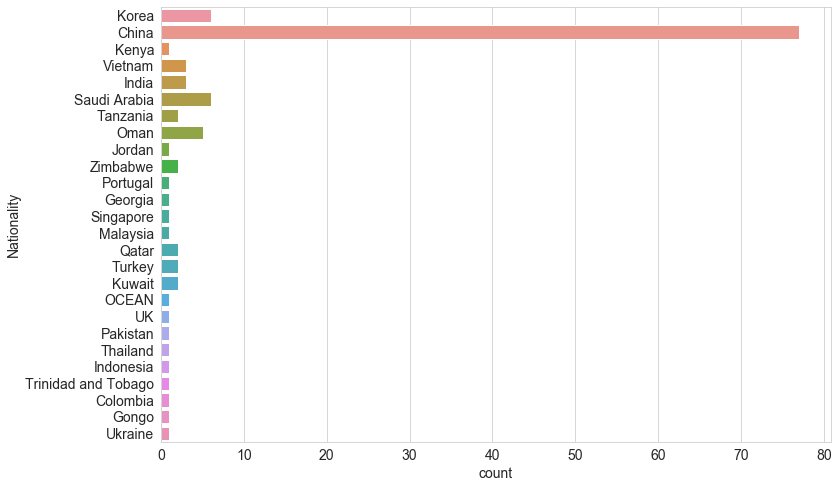

In [13]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})
sns.countplot(y='Nationality',data=students)

Most students appear to be from China.

Plots number of students enrolled in each program.

Text(0.5, 1.0, 'Program')

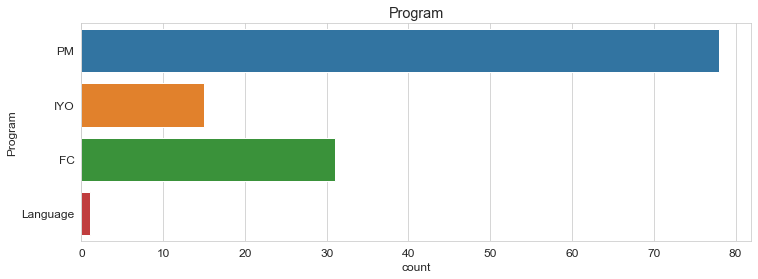

In [14]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Program',data=students)
plt.title('Program')

Plots Academic Performance of students.

Text(0.5, 1.0, 'Academic Performance')

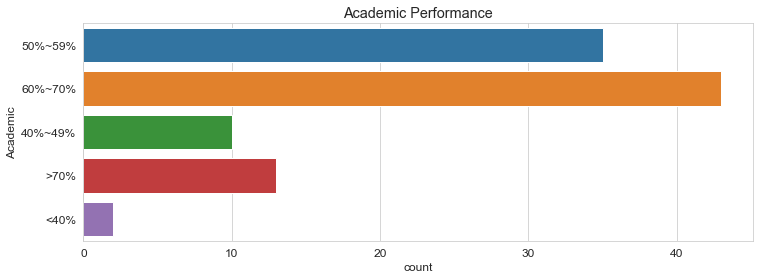

In [15]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Academic',data=students)
plt.title('Academic Performance')

Plot Attendance Levels of students

Text(0.5, 1.0, 'Attendance: S0 = highest attendance; S4 = lowest attendance')

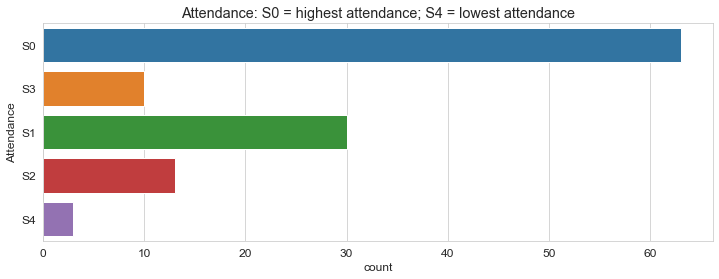

In [16]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Attendance',data=students)
plt.title('Attendance: S0 = highest attendance; S4 = lowest attendance')

## Time Management Questionnaire

The following plots depict gender differences for each questionnaire item. Value counts are shown for each unique label.

Item 6

In [17]:
pd.Series(students['6'].unique())

0           Disagree
1       Strong Agree
2            Neither
3              Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You often feel that your life is aimless, with no definite purpose')

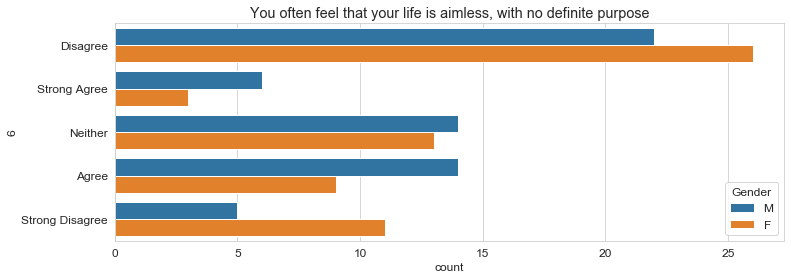

In [18]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='6',hue='Gender',data=students)
plt.title('You often feel that your life is aimless, with no definite purpose')

Item 7

In [19]:
pd.Series(students['7'].unique())

0              Agree
1       Strong Agree
2           Disagree
3            Neither
4    Strong Disagree
dtype: object

Text(0.5, 1.0, 'You never have trouble organising the things you have to do')

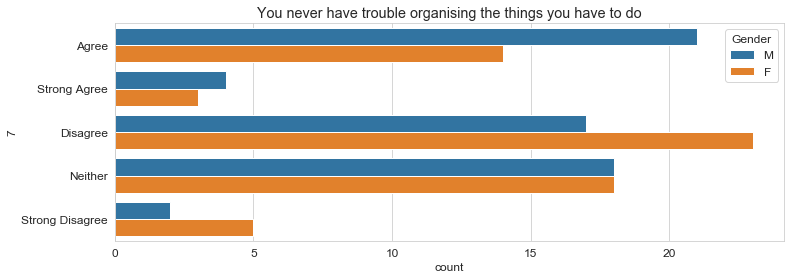

In [20]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='7',hue='Gender',data=students)
plt.title('You never have trouble organising the things you have to do')

Item 8

In [21]:
pd.Series(students['8'].unique())

0       Strong Agree
1            Neither
2              Agree
3    Strong Disagree
4           Disagree
5                NaN
dtype: object

Text(0.5, 1.0, "Once you've started an activity, you persist at it until you've completed it")

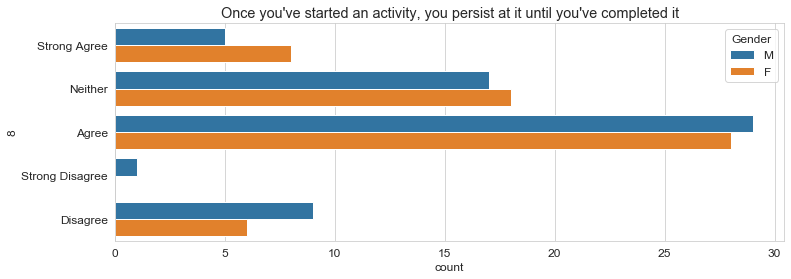

In [22]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='8',hue='Gender',data=students)
plt.title('Once you\'ve started an activity, you persist at it until you\'ve completed it')

Item 9

In [23]:
pd.Series(students['9'].unique())

0            Neither
1           Disagree
2              Agree
3       Strong Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, "Sometimes you feel that the things you have to do during the day just don't seem to matter")

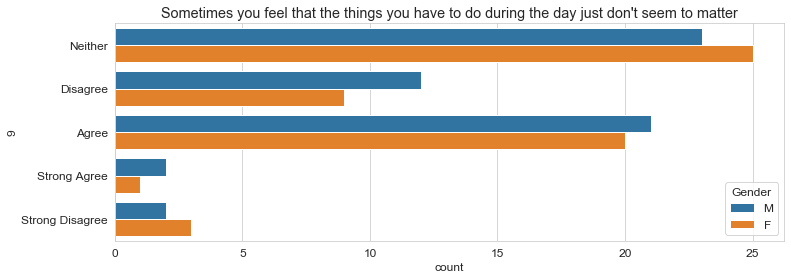

In [24]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='9',hue='Gender',data=students)
plt.title('Sometimes you feel that the things you have to do during the day just don\'t seem to matter')

Item 10

In [25]:
pd.Series(students['10'].unique())

0              Agree
1           Disagree
2            Neither
3       Strong Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You will plan your activities from day to day')

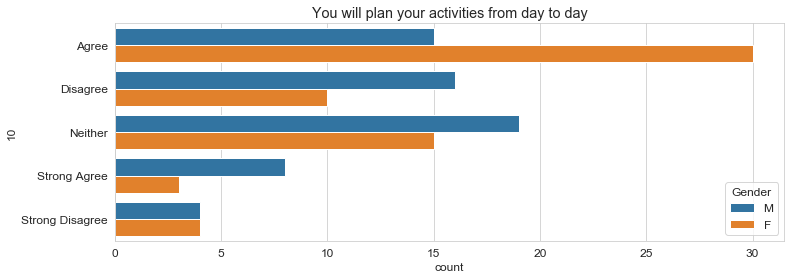

In [26]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='10',hue='Gender',data=students)
plt.title('You will plan your activities from day to day')

Item 11

In [27]:
pd.Series(students['11'].unique())

0            Neither
1              Agree
2           Disagree
3    Strong Disagree
4       Strong Agree
5                NaN
dtype: object

Text(0.5, 1.0, 'You tend to leave things to last minute')

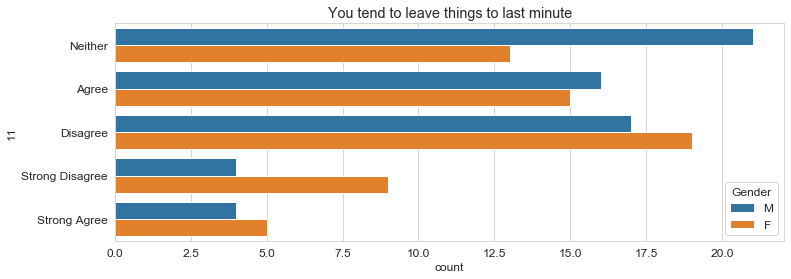

In [28]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='11',hue='Gender',data=students)
plt.title('You tend to leave things to last minute')

Item 12

In [29]:
pd.Series(students['12'].unique())

0           Disagree
1            Neither
2       Strong Agree
3              Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You tend to change rather aimlessly from one activity to another during the day')

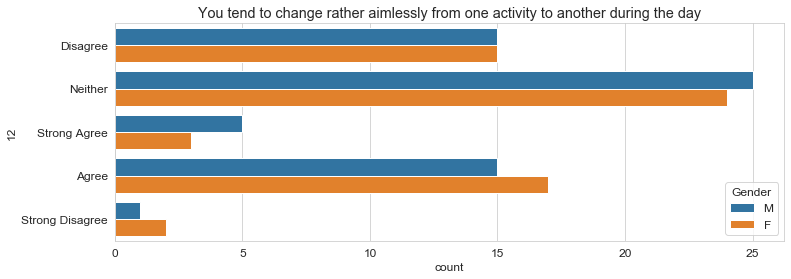

In [30]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='12',hue='Gender',data=students)
plt.title('You tend to change rather aimlessly from one activity to another during the day')

Item 13

In [31]:
pd.Series(students['13'].unique())

0    Strong Disagree
1            Neither
2              Agree
3           Disagree
4       Strong Agree
dtype: object

Text(0.5, 1.0, 'You give up the things that you were planning to do just because your friend says no')

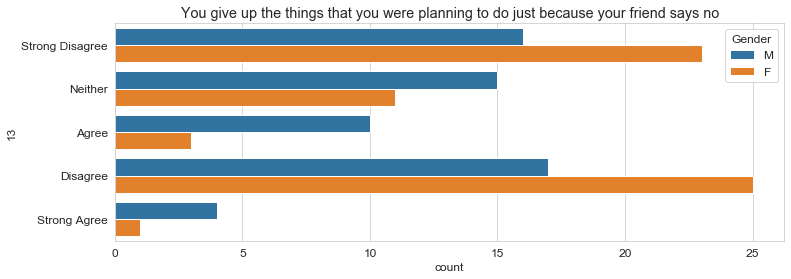

In [32]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='13',hue='Gender',data=students)
plt.title('You give up the things that you were planning to do just because your friend says no')

Item 14

In [33]:
pd.Series(students['14'].unique())

0       Strong Agree
1            Neither
2           Disagree
3              Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You think you do enough with your time')

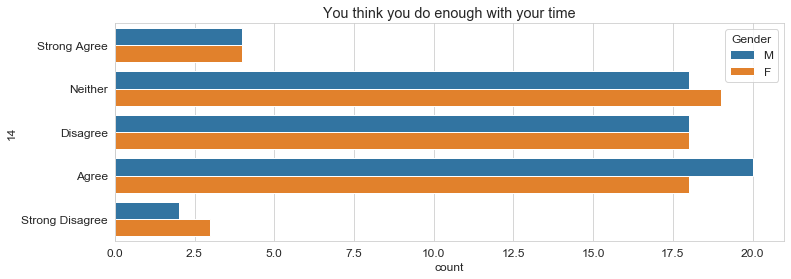

In [34]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='14',hue='Gender',data=students)
plt.title('You think you do enough with your time')

Item 15

In [35]:
pd.Series(students['15'].unique())

0            Neither
1              Agree
2       Strong Agree
3           Disagree
4    Strong Disagree
dtype: object

Text(0.5, 1.0, 'You are easy to get bored with your day-to-day activities')

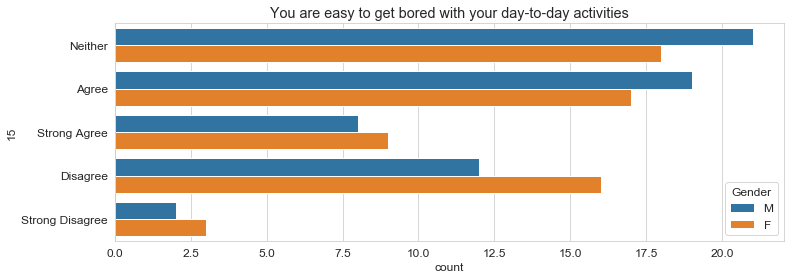

In [36]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='15',hue='Gender',data=students)
plt.title('You are easy to get bored with your day-to-day activities')

Item 16

In [37]:
pd.Series(students['16'].unique())

0           Disagree
1            Neither
2       Strong Agree
3    Strong Disagree
4              Agree
5                NaN
dtype: object

Text(0.5, 1.0, 'The important interests/activities in your life tend to change frequently')

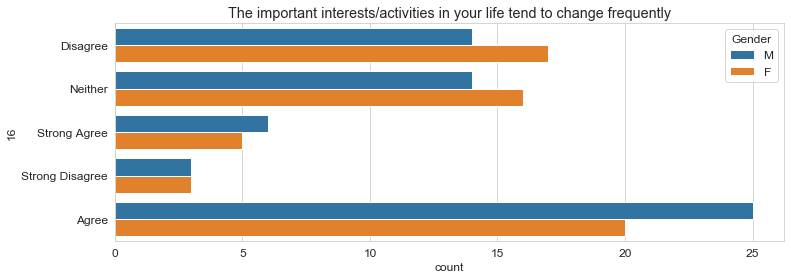

In [38]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='16',hue='Gender',data=students)
plt.title('The important interests/activities in your life tend to change frequently')

Item 17

In [39]:
pd.Series(students['17'].unique())

0              Agree
1           Disagree
2       Strong Agree
3            Neither
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You know how much time you spend on each of the homework you do')

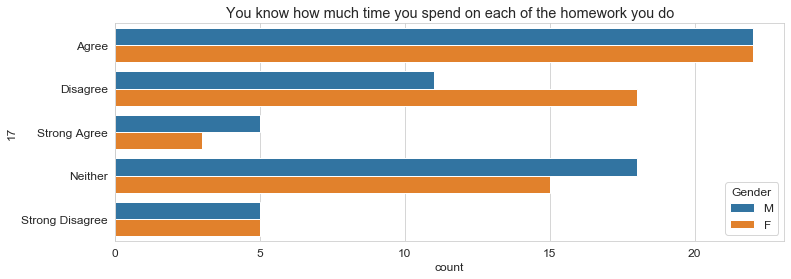

In [40]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='17',hue='Gender',data=students)
plt.title('You know how much time you spend on each of the homework you do')

Plots the Academic marks by Attendence levels.

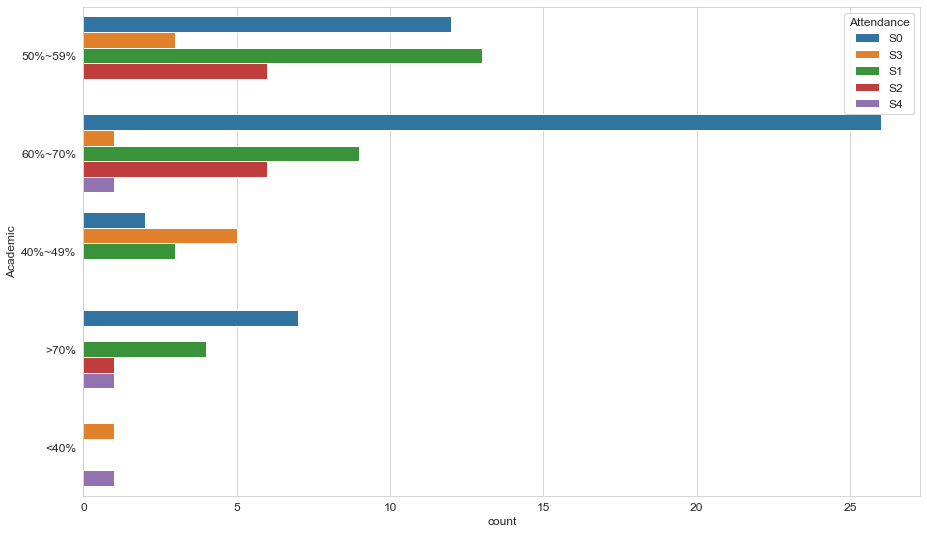

In [41]:
plt.figure(figsize=(15, 9))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Academic', hue='Attendance', data=students)

Lists unique values in Attendance column

In [42]:
pd.Series(students['Attendance'].unique())

0     S0
1     S3
2     S1
3     S2
4     S4
5    NaN
dtype: object

## Deep Learning Prerequisites - Creating dummy variables

After having a look at the available features, we will see if we can predict Attendance using these self-rated time management scores and Gender. However, depending on the performance of the model, we can incorporate fewer or more features as necessary, or construct new summary features to reduce dimensionality of the input variables.

First, create dummy variables that split categorical variables into multiple columns. As with linear regression models, dummy variables can be used to model categorical features in deep learning models.

In [43]:
# Create dummy variables for Questionnaire items and append original Students table with new dummy variables. 
# Simultaneously drops the original columns for the questionnaires.
x_dummies = pd.get_dummies(students[['Gender','6', '7','8','9','10','11','12','13','14','15','16','17']],
                           dummy_na=True,drop_first=True)

# Don't drop first column as this is needed for labelling. 
# Column for NaN's included.
y_dummies = pd.get_dummies(students[['Attendance']], dummy_na=True) 

# Remove old columns.
students = students.drop(['Gender','Attendance','6', '7','8','9','10','11','12','13','14','15','16','17'],axis=1) 
students = pd.concat([students,x_dummies,y_dummies],axis=1)

Check that dummy variables have been encoded correctly.

In [44]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 75 columns):
Number                125 non-null int64
Age                   125 non-null object
Nationality           125 non-null object
Program               125 non-null object
Course                125 non-null object
English               119 non-null object
Academic              103 non-null object
Gender_M              125 non-null uint8
Gender_nan            125 non-null uint8
6_Disagree            125 non-null uint8
6_Neither             125 non-null uint8
6_Strong Agree        125 non-null uint8
6_Strong Disagree     125 non-null uint8
6_nan                 125 non-null uint8
7_Disagree            125 non-null uint8
7_Neither             125 non-null uint8
7_Strong Agree        125 non-null uint8
7_Strong Disagree     125 non-null uint8
7_nan                 125 non-null uint8
8_Disagree            125 non-null uint8
8_Neither             125 non-null uint8
8_Strong Agree        125 no

Set X (features) and y (Attendance) variables. X is a list of predictors and y is the predicted variable.

Select just the questionnaire and Gender dummy variables for training, assigned to X.

In [45]:
X = students.drop(['Number','Age','Nationality','Program','Course','English','Academic'],axis=1).values

Select just the Attendance scores, including a column for NaN's to help with labelling.

In [46]:
y = students[['Attendance_S0','Attendance_S1','Attendance_S2','Attendance_S3','Attendance_S4','Attendance_nan']].values

Check that the y array has been created properly for training. Each row should reflect which categorical label has been selected indicating Attendance. 

In [47]:
y

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
 

# Model Selection

Import library for splitting data into training set and test set.

In [48]:
from sklearn.model_selection import train_test_split

Feed X and y variables into train_test_split, with a test size of 20%. A random state of 101 has been specified to get consistent results.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Feature scaling

Since we intend to use questionnaire items to predict attendence levels and X and y have different scales, we will scale the items to obtain better model performance.

Import MinMaxScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

Create scaler.

In [51]:
scaler = MinMaxScaler()

Fit scaler object to X_train and transform X_train in one step.

In [52]:
X_train = scaler.fit_transform(X_train)

Fit scaler object to X test set

In [53]:
X_test = scaler.transform(X_test)

# Use TensorFlow to run Deep Learning

After importing the TensorFlow and Keras libraries, we will be able to specify the shape of our neural network. The first layer of the network will have as many nodes as there are input features. The second layer of the network will have half the number of nodes in the first layer.

In [54]:
# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [55]:
model = Sequential() # To be able to add more layers if considered necessary.

model.add(Dense(62,activation='relu')) # number of neurons in first layer = number of features
model.add(Dense(31,activation='relu')) # number of neurons in second layer = half number of input features
# model.add(Dense(19,activation='relu'))

# Binary Classification problem:
model.add(Dense(6,activation='softmax')) # number of output neuron is only 1 because we are only predicting a single outcome

# Our question is categorical, so we've chosen categorical_crossentropy to predict the labels of y.
model.compile(loss='categorical_crossentropy',optimizer='adam') 

In [56]:
# Fit the model with a batch size of 5 rows, running 40 epochs through the dataset.
# Training the model only on training data. Tested on validation data, which is x_test and y_test.
model.fit(x=X_train,y=y_train,epochs=40,batch_size=5,validation_data=(X_test,y_test))

Train on 100 samples, validate on 25 samples
Epoch 1/40
100/100 [==============================] - 1s 9ms/sample - loss: 1.6834 - val_loss: 1.5795
Epoch 2/40
100/100 [==============================] - 0s 949us/sample - loss: 1.3928 - val_loss: 1.3509
Epoch 3/40
100/100 [==============================] - 0s 699us/sample - loss: 1.1466 - val_loss: 1.1616
Epoch 4/40
100/100 [==============================] - 0s 729us/sample - loss: 0.9576 - val_loss: 1.0465
Epoch 5/40
100/100 [==============================] - 0s 659us/sample - loss: 0.8153 - val_loss: 0.9312
Epoch 6/40
100/100 [==============================] - 0s 1ms/sample - loss: 0.6765 - val_loss: 0.8373
Epoch 7/40
100/100 [==============================] - 0s 789us/sample - loss: 0.5651 - val_loss: 0.7467
Epoch 8/40
100/100 [==============================] - 0s 809us/sample - loss: 0.4559 - val_loss: 0.6613
Epoch 9/40
100/100 [==============================] - 0s 769us/sample - loss: 0.3685 - val_loss: 0.5875
Epoch 10/40
100/100 [==

Plot the stochastic gradient losses. This indicates the difference between the prediction and the actual value.

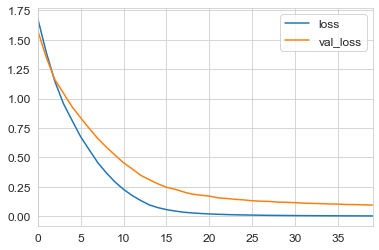

In [57]:
losses = pd.DataFrame(model.history.history)

# Compare losses on validation set (val_loss, in orange) and the training set (loss, in blue)
losses[['loss','val_loss']].plot()

# Prediction Labels

Create an array with the predictions

In [58]:
predictions = model.predict_classes(X_test)

View this array to check class labels. We will now need to convert these numbers back to their original labels indicating Attendance level.

In [59]:
predictions

array([5, 1, 0, 2, 0, 0, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0,
       1, 1, 0], dtype=int64)

View y_test array, still coded as dummy variables

In [60]:
y_test

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

Check labelling of attendendance values

In [61]:
students[['Attendance_S0','Attendance_S1','Attendance_S2','Attendance_S3','Attendance_S4','Attendance_nan']].head(12)

,Attendance_S0,Attendance_S1,Attendance_S2,Attendance_S3,Attendance_S4,Attendance_nan
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


Create a dictionary that matches the label in the predictions array with the correct Attendance label.

In [62]:
prediction_dictionary = {'0': 'S0', '1': 'S1', '2': 'S2',
'3': 'S3', '4': 'S4','5':'nan'}

Create a new dataframe for the name of the predictions. Use the mapping function to map the dictionary labels to the predictions array.

In [63]:
prediction_name = pd.Series(predictions).apply(str).map(prediction_dictionary)

View the new Attendance labels for predictions.

In [64]:
prediction_name

0     nan
1      S1
2      S0
3      S2
4      S0
5      S0
6      S0
7      S3
8      S3
9      S1
10     S2
11     S0
12     S0
13     S0
14     S0
15     S0
16     S0
17     S2
18     S1
19     S0
20     S1
21     S0
22     S1
23     S1
24     S0
dtype: object

Now to recode the y_test dummy variables back to categorical labels. First create a dataframe of y_test

In [65]:
y_test_df = pd.DataFrame(y_test)

Now create a y_test variable that concatenates (row-wise) all of the dummy variables into a single string column.

In [66]:
y_test_dummy_label = y_test_df[0].apply(str) + y_test_df[1].apply(str) + y_test_df[2].apply(str) + y_test_df[3].apply(str) + y_test_df[4].apply(str) + y_test_df[5].apply(str)

In [67]:
y_test_dummy_label

0     000001
1     010000
2     100000
3     001000
4     100000
5     100000
6     100000
7     000100
8     000100
9     010000
10    001000
11    100000
12    100000
13    100000
14    100000
15    100000
16    000010
17    001000
18    010000
19    100000
20    010000
21    100000
22    010000
23    010000
24    100000
dtype: object

Create a label dictionary that matches the string to its appropriate Attendance label.

In [68]:
label_dictionary = {'100000': 'S0', '010000': 'S1', '001000': 'S2',
'000100': 'S3', '000010': 'S4', '000001':'nan'}

Create a new column that takes maps the dictionary labels on to the strings indicating Attendance.

In [69]:
y_test_name = y_test_dummy_label.map(label_dictionary)

View the new column

In [70]:
y_test_name

0     nan
1      S1
2      S0
3      S2
4      S0
5      S0
6      S0
7      S3
8      S3
9      S1
10     S2
11     S0
12     S0
13     S0
14     S0
15     S0
16     S4
17     S2
18     S1
19     S0
20     S1
21     S0
22     S1
23     S1
24     S0
dtype: object

Create a dataframe where y_test labels and prediction labels can be viewed side-by-side.

In [71]:
prediction_vs_y_test = pd.concat([prediction_name, y_test_name], axis=1)

In [72]:
prediction_vs_y_test

,0,1
0,nan,nan
1,S1,S1
2,S0,S0
3,S2,S2
4,S0,S0
5,S0,S0
6,S0,S0
7,S3,S3
8,S3,S3
9,S1,S1


Once this new dataframe is created, create a new column called "Correct" that compares the prediction vs y_test labels to each other. Wherever they match, the Correct column will report a 1.

In [73]:
prediction_vs_y_test['Correct'] = np.where((prediction_vs_y_test[0] == prediction_vs_y_test[1]), 1, 0)

In [74]:
prediction_vs_y_test

,0,1,Correct
0,nan,nan,1
1,S1,S1,1
2,S0,S0,1
3,S2,S2,1
4,S0,S0,1
5,S0,S0,1
6,S0,S0,1
7,S3,S3,1
8,S3,S3,1
9,S1,S1,1


Calculate prediction accuracy of model as a percent using the "Correct" column. Other measures of validity can also be calculated if necessary.

In [76]:
(prediction_vs_y_test['Correct'].sum())/(len(prediction_vs_y_test))*100

96.0